In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import pickle

In [2]:
f=open("dataset.pickle", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test)=pickle.load(f)

In [3]:
model=tf.keras.Sequential()

In [4]:
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",
                                input_shape=(128,128,1)
                                )
         )
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu"
                                )
         )
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu"
                                )
         )

In [5]:

model.add(tf.keras.layers.Flatten())

In [6]:
model.add(tf.keras.layers.Dense(1024,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [8]:
results=model.fit(X_train, y_train,
                 epochs=15,
                 validation_data=(X_val, y_val))

Epoch 1/15
219/219 [==============================] - 19s 74ms/step - loss: 2.2454 - accuracy: 0.1374 - val_loss: 2.0965 - val_accuracy: 0.1844
Epoch 2/15
219/219 [==============================] - 16s 71ms/step - loss: 2.1053 - accuracy: 0.2218 - val_loss: 1.9765 - val_accuracy: 0.2864
Epoch 3/15
219/219 [==============================] - 15s 71ms/step - loss: 1.9347 - accuracy: 0.2720 - val_loss: 1.7458 - val_accuracy: 0.3070
Epoch 4/15
219/219 [==============================] - 15s 70ms/step - loss: 1.7849 - accuracy: 0.3316 - val_loss: 1.6779 - val_accuracy: 0.3769
Epoch 5/15
219/219 [==============================] - 20s 91ms/step - loss: 1.6306 - accuracy: 0.4109 - val_loss: 1.3776 - val_accuracy: 0.5109
Epoch 6/15
219/219 [==============================] - 20s 91ms/step - loss: 1.3929 - accuracy: 0.5055 - val_loss: 1.2117 - val_accuracy: 0.5785
Epoch 7/15
219/219 [==============================] - 20s 91ms/step - loss: 1.1755 - accuracy: 0.5943 - val_loss: 1.0270 - val_accuracy:

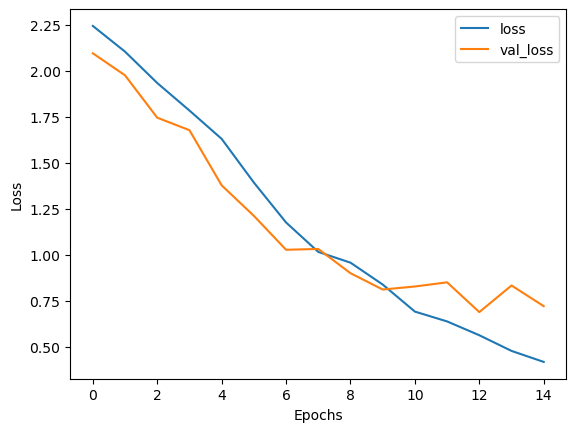

In [12]:
plt.plot(results.history['loss'], label="loss")
# Plot the the validation loss
plt.plot(results.history['val_loss'], label="val_loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
# Show the plot
plt.show()

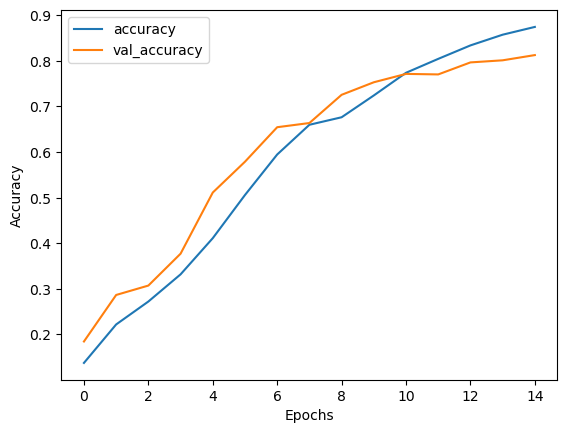

In [13]:
plt.plot(results.history['accuracy'], label="accuracy")


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [14]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 23ms/step - loss: 0.7128 - accuracy: 0.8043


[0.7128182649612427, 0.804347813129425]